In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
#import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import os
#from dotenv import load_dotenv
import requests
import json

In [3]:
from google.colab import drive
drive.mount("/content/drive")
path="/content/drive/MyDrive/Crypto_HistoricalData_2017-2021/BTC-USD (Pickthisone).csv"
Bitcoin_df = pd.read_csv(path, index_col= "Date", parse_dates= True, infer_datetime_format= True)
Bitcoin_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12897.70020,14377.40039,12755.59961,14156.40039,14156.40039,1.213630e+10
2018-01-01,14112.20020,14112.20020,13154.70020,13657.20020,13657.20020,1.029120e+10
2018-01-02,13625.00000,15444.59961,13163.59961,14982.09961,14982.09961,1.684660e+10
2018-01-03,14978.20020,15572.79981,14844.50000,15201.00000,15201.00000,1.687190e+10
2018-01-04,15270.70020,15739.70020,14522.20020,15599.20020,15599.20020,2.178320e+10
...,...,...,...,...,...,...
2021-11-27,53736.42969,55329.25781,53668.35547,54815.07813,54815.07813,3.056086e+10
2021-11-28,54813.02344,57393.84375,53576.73438,57248.45703,57248.45703,2.811689e+10
2021-11-29,57291.90625,58872.87891,56792.52734,57806.56641,57806.56641,3.237084e+10


In [4]:
path="/content/drive/MyDrive/Crypto_HistoricalData_2017-2021/BCH-USD.csv"
BitcoinCash_df = pd.read_csv(path, index_col= "Date", parse_dates= True, infer_datetime_format= True )
BitcoinCash_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,2376.959961,2627.949951,2350.030029,2533.010010,2533.010010,1.300820e+09
2018-01-01,2534.820068,2534.860107,2389.520020,2432.540039,2432.540039,9.228130e+08
2018-01-02,2434.500000,2867.139893,2434.500000,2711.000000,2711.000000,1.831230e+09
2018-01-03,2700.550049,2958.469971,2592.560059,2608.689941,2608.689941,4.688840e+09
2018-01-04,2608.870117,2610.199951,2359.300049,2430.179932,2430.179932,5.377260e+09
...,...,...,...,...,...,...
2021-11-27,556.604675,573.629150,555.838318,563.338440,563.338440,8.572744e+08
2021-11-28,563.370972,568.493103,537.422546,568.336182,568.336182,1.185817e+09
2021-11-29,568.920349,581.188171,558.350525,576.121765,576.121765,1.091029e+09


In [5]:
path="/content/drive/MyDrive/Crypto_HistoricalData_2017-2021/ETH-USD (This One).csv"
Ethereum_df = pd.read_csv(path, index_col= "Date", parse_dates= True, infer_datetime_format= True)
Ethereum_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,712.211975,760.348022,710.119019,756.732971,756.732971,2.554270e+09
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2.595760e+09
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5.783350e+09
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5.093160e+09
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6.502860e+09
...,...,...,...,...,...,...
2021-11-27,4042.999023,4187.684082,4033.513916,4096.912109,4096.912109,1.651569e+10
2021-11-28,4101.648926,4297.916504,3989.969971,4294.453613,4294.453613,1.595313e+10
2021-11-29,4296.946777,4460.848633,4284.504883,4445.104980,4445.104980,1.908648e+10


In [6]:
path="/content/drive/MyDrive/Crypto_HistoricalData_2017-2021/LTC-USD.csv"
LiteCoin_df = pd.read_csv(path, index_col= "Date", parse_dates= True, infer_datetime_format= True)
LiteCoin_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,216.975006,237.791000,213.811005,232.095993,232.095993,7.710420e+08
2018-01-01,231.666000,236.634003,222.203003,229.033005,229.033005,6.331420e+08
2018-01-02,228.990005,263.625000,228.990005,255.684006,255.684006,1.237950e+09
2018-01-03,255.695007,260.742004,243.134995,245.367996,245.367996,3.215280e+09
2018-01-04,245.475006,245.475006,227.013000,241.369995,241.369995,3.481550e+09
...,...,...,...,...,...,...
2021-11-27,195.557861,200.845459,191.198303,195.174423,195.174423,1.406618e+09
2021-11-28,195.414597,199.871216,184.106033,199.354218,199.354218,1.712283e+09
2021-11-29,199.590988,209.291626,195.754562,205.870209,205.870209,1.784851e+09


In [7]:
# separate into individual dataframes

btc_signals_df=Bitcoin_df.loc[:, ["Close"]]
eth_signals_df=Ethereum_df.loc[:, ["Close"]]
ltc_signals_df=LiteCoin_df.loc[:, ["Close"]]
bch_signals_df=BitcoinCash_df.loc[:,["Close"]]

display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

,Close
Date,
2017-12-31,14156.40039
2018-01-01,13657.20020
2018-01-02,14982.09961
2018-01-03,15201.00000
2018-01-04,15599.20020


,Close
Date,
2017-12-31,756.732971
2018-01-01,772.640991
2018-01-02,884.443970
2018-01-03,962.719971
2018-01-04,980.921997


,Close
Date,
2017-12-31,232.095993
2018-01-01,229.033005
2018-01-02,255.684006
2018-01-03,245.367996
2018-01-04,241.369995


,Close
Date,
2017-12-31,2533.010010
2018-01-01,2432.540039
2018-01-02,2711.000000
2018-01-03,2608.689941
2018-01-04,2430.179932


In [8]:
# use pct_change function to get actual returns and dropna

btc_signals_df["Actual Returns"]=btc_signals_df["Close"].pct_change()
eth_signals_df["Actual Returns"]=eth_signals_df["Close"].pct_change()
ltc_signals_df["Actual Returns"]=ltc_signals_df["Close"].pct_change()
bch_signals_df["Actual Returns"]=bch_signals_df["Close"].pct_change()

btc_signals_df=btc_signals_df.dropna()
eth_signals_df=eth_signals_df.dropna()
ltc_signals_df=ltc_signals_df.dropna()
bch_signals_df=bch_signals_df.dropna()

display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

,Close,Actual Returns
Date,,
2018-01-01,13657.20020,-0.035263
2018-01-02,14982.09961,0.097011
2018-01-03,15201.00000,0.014611
2018-01-04,15599.20020,0.026196
2018-01-05,17429.50000,0.117333


,Close,Actual Returns
Date,,
2018-01-01,772.640991,0.021022
2018-01-02,884.443970,0.144702
2018-01-03,962.719971,0.088503
2018-01-04,980.921997,0.018907
2018-01-05,997.719971,0.017125


,Close,Actual Returns
Date,,
2018-01-01,229.033005,-0.013197
2018-01-02,255.684006,0.116363
2018-01-03,245.367996,-0.040347
2018-01-04,241.369995,-0.016294
2018-01-05,249.270996,0.032734


,Close,Actual Returns
Date,,
2018-01-01,2432.540039,-0.039664
2018-01-02,2711.000000,0.114473
2018-01-03,2608.689941,-0.037739
2018-01-04,2430.179932,-0.068429
2018-01-05,2584.479980,0.063493


In [9]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages 

btc_signals_df['SMA_Fast']=btc_signals_df['Close'].rolling(window=short_window).mean()
btc_signals_df['SMA_Slow']=btc_signals_df['Close'].rolling(window=long_window).mean()

In [85]:
short_window = 10
long_window = 100

eth_signals_df['SMA_Fast']=eth_signals_df['Close'].rolling(window=short_window).mean()
eth_signals_df['SMA_Slow']=eth_signals_df['Close'].rolling(window=long_window).mean()

In [117]:
short_window = 20
long_window = 100

ltc_signals_df['SMA_Fast']=ltc_signals_df['Close'].rolling(window=short_window).mean()
ltc_signals_df['SMA_Slow']=ltc_signals_df['Close'].rolling(window=long_window).mean()

In [135]:
short_window = 20
long_window = 100

bch_signals_df['SMA_Fast']=bch_signals_df['Close'].rolling(window=short_window).mean()
bch_signals_df['SMA_Slow']=bch_signals_df['Close'].rolling(window=long_window).mean()

In [ ]:
#check your work
display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

In [14]:
# add the  Signal column
btc_signals_df['Signal']=0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock 

btc_signals_df.loc[(btc_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock

btc_signals_df.loc[(btc_signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [86]:
eth_signals_df['Signal']=0.0
eth_signals_df.loc[(eth_signals_df['Actual Returns'] >= 0), 'Signal'] = 1
eth_signals_df.loc[(eth_signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [118]:
ltc_signals_df['Signal']=0.0
ltc_signals_df.loc[(ltc_signals_df['Actual Returns'] >= 0), 'Signal'] = 1
ltc_signals_df.loc[(ltc_signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [136]:
bch_signals_df['Signal']=0.0
bch_signals_df.loc[(bch_signals_df['Actual Returns'] >= 0), 'Signal'] = 1
bch_signals_df.loc[(bch_signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [ ]:
# check your work
display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

display(btc_signals_df.tail())
display(eth_signals_df.tail())
display(ltc_signals_df.tail())
display(bch_signals_df.tail())

In [19]:
# Add Strategy Returns column
btc_signals_df['Strategy Returns'] = btc_signals_df['Actual Returns'] * btc_signals_df['Signal'].shift()

In [87]:
eth_signals_df['Strategy Returns'] = eth_signals_df['Actual Returns'] * eth_signals_df['Signal'].shift()

In [119]:
ltc_signals_df['Strategy Returns'] = ltc_signals_df['Actual Returns'] * ltc_signals_df['Signal'].shift()

In [137]:
bch_signals_df['Strategy Returns'] = bch_signals_df['Actual Returns'] * bch_signals_df['Signal'].shift()

In [ ]:
# check your work
display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

display(btc_signals_df.tail())
display(eth_signals_df.tail())
display(ltc_signals_df.tail())
display(bch_signals_df.tail())

In [24]:
# create X and y variables
btc_X = btc_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
btc_y = btc_signals_df['Signal']

In [88]:
eth_X = eth_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
eth_y = eth_signals_df['Signal']

In [120]:
ltc_X = ltc_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
ltc_y = ltc_signals_df['Signal']

In [138]:
bch_X = bch_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
bch_y = bch_signals_df['Signal']

In [28]:
# set training start and end times
btc_training_begin = btc_X.index.min()
btc_training_end = btc_X.index.min() + DateOffset(months=4)

In [89]:
eth_training_begin = eth_X.index.min()
eth_training_end = eth_X.index.min() + DateOffset(months=2)

In [128]:
ltc_training_begin = ltc_X.index.min()
ltc_training_end = ltc_X.index.min() + DateOffset(months=2)

In [150]:
bch_training_begin = bch_X.index.min()
bch_training_end = bch_X.index.min() + DateOffset(months=1)

In [32]:
# create train and test variables
btc_X_train = btc_X.loc[btc_training_begin:btc_training_end]
btc_y_train = btc_y.loc[btc_training_begin:btc_training_end]

btc_X_test = btc_X.loc[btc_training_end+DateOffset(hours=1):]
btc_y_test = btc_y.loc[btc_training_end+DateOffset(hours=1):]

In [90]:
eth_X_train = eth_X.loc[eth_training_begin:eth_training_end]
eth_y_train = eth_y.loc[eth_training_begin:eth_training_end]

eth_X_test = eth_X.loc[eth_training_end+DateOffset(hours=1):]
eth_y_test = eth_y.loc[eth_training_end+DateOffset(hours=1):]

In [129]:
ltc_X_train = ltc_X.loc[ltc_training_begin:ltc_training_end]
ltc_y_train = ltc_y.loc[ltc_training_begin:ltc_training_end]

ltc_X_test = ltc_X.loc[ltc_training_end+DateOffset(hours=1):]
ltc_y_test = ltc_y.loc[ltc_training_end+DateOffset(hours=1):]

In [151]:
bch_X_train = bch_X.loc[bch_training_begin:bch_training_end]
bch_y_train = bch_y.loc[bch_training_begin:bch_training_end]

bch_X_test = bch_X.loc[bch_training_end+DateOffset(hours=1):]
bch_y_test = bch_y.loc[bch_training_end+DateOffset(hours=1):]

In [36]:
# scale the features
btc_scaler = StandardScaler()
btc_X_scaler = btc_scaler.fit(btc_X_train)
btc_X_train_scaled = btc_X_scaler.transform(btc_X_train)
btc_X_test_scaled = btc_X_scaler.transform(btc_X_test)

In [91]:
eth_scaler = StandardScaler()
eth_X_scaler = eth_scaler.fit(eth_X_train)
eth_X_train_scaled = eth_X_scaler.transform(eth_X_train)
eth_X_test_scaled = eth_X_scaler.transform(eth_X_test)

In [130]:
ltc_scaler = StandardScaler()
ltc_X_scaler = ltc_scaler.fit(ltc_X_train)
ltc_X_train_scaled = ltc_X_scaler.transform(ltc_X_train)
ltc_X_test_scaled = ltc_X_scaler.transform(ltc_X_test)

In [152]:
bch_scaler = StandardScaler()
bch_X_scaler = bch_scaler.fit(bch_X_train)
bch_X_train_scaled = bch_X_scaler.transform(bch_X_train)
bch_X_test_scaled = bch_X_scaler.transform(bch_X_test)

In [40]:
# use SKLearn SVC classifier to fit and predict
btc_model = svm.SVC()
btc_model = btc_model.fit(btc_X_train_scaled, btc_y_train)
btc_pred = btc_model.predict(btc_X_test_scaled)
btc_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [92]:
eth_model = svm.SVC()
eth_model = eth_model.fit(eth_X_train_scaled, eth_y_train)
eth_pred = eth_model.predict(eth_X_test_scaled)
eth_pred

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [131]:
ltc_model = svm.SVC()
ltc_model = ltc_model.fit(ltc_X_train_scaled, ltc_y_train)
ltc_pred = ltc_model.predict(ltc_X_test_scaled)
ltc_pred

array([ 1., -1., -1., ...,  1.,  1.,  1.])

In [153]:
bch_model = svm.SVC()
bch_model = bch_model.fit(bch_X_train_scaled, bch_y_train)
bch_pred = bch_model.predict(bch_X_test_scaled)
bch_pred

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [93]:
# review the classification report
btc_testing_report = classification_report(btc_y_test, btc_pred)
print(btc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.48      0.19      0.27       565
         1.0       0.53      0.82      0.65       639

    accuracy                           0.52      1204
   macro avg       0.50      0.50      0.46      1204
weighted avg       0.51      0.52      0.47      1204



In [94]:
eth_testing_report = classification_report(eth_y_test, eth_pred)
print(eth_testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.06      0.10       601
         1.0       0.53      0.94      0.68       664

    accuracy                           0.52      1265
   macro avg       0.51      0.50      0.39      1265
weighted avg       0.51      0.52      0.40      1265



In [132]:
ltc_testing_report = classification_report(ltc_y_test, ltc_pred)
print(ltc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.44      0.03      0.05       627
         1.0       0.50      0.97      0.66       638

    accuracy                           0.50      1265
   macro avg       0.47      0.50      0.36      1265
weighted avg       0.47      0.50      0.36      1265



In [156]:
bch_testing_report = classification_report(bch_y_test, bch_pred)
print(bch_testing_report)

              precision    recall  f1-score   support

        -1.0       0.62      0.01      0.02       662
         1.0       0.49      0.99      0.66       634

    accuracy                           0.49      1296
   macro avg       0.55      0.50      0.34      1296
weighted avg       0.55      0.49      0.33      1296



In [50]:
# Create a new data frame to compare Actual Returns and Strategy Returns
btc_predictions_df = pd.DataFrame(index=btc_X_test.index)
btc_predictions_df['Predicted'] = btc_pred
btc_predictions_df['Actual Returns'] = btc_signals_df['Actual Returns']
btc_predictions_df['Strategy Returns'] = (
    btc_predictions_df['Actual Returns'] * btc_predictions_df['Predicted'])
display(btc_predictions_df.head())
display(btc_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-08-12,1.0,0.004282,0.004282
2018-08-13,1.0,-0.003973,-0.003973
2018-08-14,1.0,-0.015539,-0.015539
2018-08-15,1.0,0.017551,0.017551
2018-08-16,1.0,0.004155,0.004155


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-11-27,1.0,0.023247,0.023247
2021-11-28,1.0,0.044393,0.044393
2021-11-29,1.0,0.009749,0.009749
2021-11-30,1.0,-0.013859,-0.013859
2021-12-01,1.0,0.003937,0.003937


In [95]:
eth_predictions_df = pd.DataFrame(index=eth_X_test.index)
eth_predictions_df['Predicted'] = eth_pred
eth_predictions_df['Actual Returns'] = eth_signals_df['Actual Returns']
eth_predictions_df['Strategy Returns'] = (
    eth_predictions_df['Actual Returns'] * eth_predictions_df['Predicted'])
display(eth_predictions_df.head())
display(eth_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-06-12,-1.0,-0.068333,0.068333
2018-06-13,-1.0,-0.038944,0.038944
2018-06-14,-1.0,0.088479,-0.088479
2018-06-15,-1.0,-0.055293,0.055293
2018-06-16,-1.0,0.017593,-0.017593


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-11-27,1.0,0.016374,0.016374
2021-11-28,1.0,0.048217,0.048217
2021-11-29,1.0,0.035080,0.035080
2021-11-30,1.0,0.041928,0.041928
2021-12-01,1.0,-0.009606,-0.009606


In [133]:
ltc_predictions_df = pd.DataFrame(index=ltc_X_test.index)
ltc_predictions_df['Predicted'] = ltc_pred
ltc_predictions_df['Actual Returns'] = ltc_signals_df['Actual Returns']
ltc_predictions_df['Strategy Returns'] = (
    ltc_predictions_df['Actual Returns'] * ltc_predictions_df['Predicted'])
display(ltc_predictions_df.head())
display(ltc_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-06-12,1.0,-0.062912,-0.062912
2018-06-13,-1.0,-0.066266,0.066266
2018-06-14,-1.0,0.075242,-0.075242
2018-06-15,-1.0,-0.044269,0.044269
2018-06-16,-1.0,0.009320,-0.009320


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-11-27,1.0,0.001538,0.001538
2021-11-28,1.0,0.021416,0.021416
2021-11-29,1.0,0.032685,0.032685
2021-11-30,1.0,0.010416,0.010416
2021-12-01,1.0,0.004599,0.004599


In [157]:
bch_predictions_df = pd.DataFrame(index=bch_X_test.index)
bch_predictions_df['Predicted'] = bch_pred
bch_predictions_df['Actual Returns'] = bch_signals_df['Actual Returns']
bch_predictions_df['Strategy Returns'] = (
    bch_predictions_df['Actual Returns'] * bch_predictions_df['Predicted'])
display(bch_predictions_df.head())
display(bch_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-05-12,-1.0,0.073381,-0.073381
2018-05-13,-1.0,0.014072,-0.014072
2018-05-14,-1.0,-0.041142,0.041142
2018-05-15,-1.0,-0.061682,0.061682
2018-05-16,-1.0,-0.046718,0.046718


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-11-27,1.0,0.013510,0.013510
2021-11-28,1.0,0.008872,0.008872
2021-11-29,1.0,0.013699,0.013699
2021-11-30,1.0,-0.009706,-0.009706
2021-12-01,1.0,0.000924,0.000924


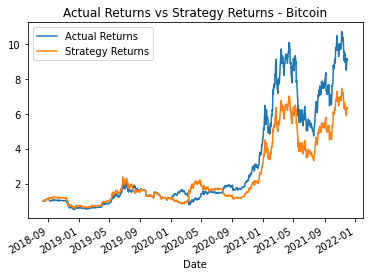

In [54]:
# Plot the actual vs strategy returns
btc_plot=(1+ btc_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
title='Actual Returns vs Strategy Returns - Bitcoin')

btc_plot

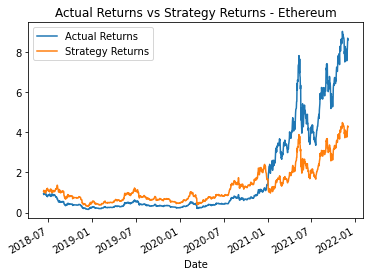

In [96]:
eth_plot=(1+ eth_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
title='Actual Returns vs Strategy Returns - Ethereum')

eth_plot

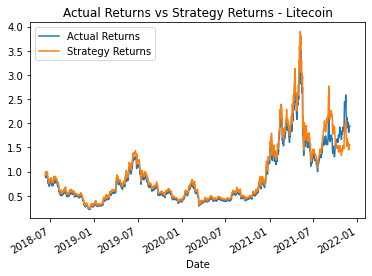

In [134]:
ltc_plot=(1+ ltc_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
title='Actual Returns vs Strategy Returns - Litecoin')

ltc_plot

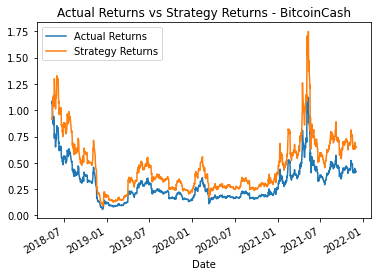

In [158]:
bch_plot=(1+ bch_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
title='Actual Returns vs Strategy Returns - BitcoinCash')

bch_plot